In [13]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import RandomNormal


In [14]:
# Read the csv file
diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Create X (feature matrix) 
X = diabetes.drop("Outcome", axis=1)

# Create Y (labels)
y = diabetes["Outcome"]

In [17]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [18]:
# Select the keras Sequential model
model = Sequential()

# Define input explicitly
model.add(Input(shape=(8,)))  

# Add layer
model.add(Dense(units=24, activation='relu', kernel_initializer=RandomNormal()))
model.add(Dense(units=12, activation='relu', kernel_initializer=RandomNormal()))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=RandomNormal()))

In [21]:
# Fit and train/compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=180, batch_size=10)

Epoch 1/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8524 - loss: 0.3705 
Epoch 2/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.8300 - loss: 0.4027
Epoch 3/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.8255 - loss: 0.3695
Epoch 4/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8136 - loss: 0.3776
Epoch 5/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.8206 - loss: 0.3695
Epoch 6/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8210 - loss: 0.3754
Epoch 7/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.8348 - loss: 0.3693
Epoch 8/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.7970 - loss: 0.3947
Epoch 9/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8134 - loss: 0.3746
Epoch 10/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7966 - loss: 0.4224
Epoch 11/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8233 - loss: 0.3672
Epoch 12/180
62/62 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
# Evaluate the model
accuracy_test = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.7635 


In [24]:
# Predicted probabilities
y_pred_prob = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [25]:
y_pred_prob

array([[9.74437781e-03],
       [1.65047243e-01],
       [1.53726796e-02],
       [5.05675077e-01],
       [6.32510841e-01],
       [3.12520750e-02],
       [7.49502540e-01],
       [7.85829425e-01],
       [4.43970919e-01],
       [5.16807377e-01],
       [7.13393509e-01],
       [6.36652932e-02],
       [3.62230539e-02],
       [1.05010822e-01],
       [2.15280801e-02],
       [8.00709546e-01],
       [3.38971586e-05],
       [7.52344370e-01],
       [4.17619079e-01],
       [6.04258597e-01],
       [4.72610779e-02],
       [5.23081660e-01],
       [1.88533403e-02],
       [7.56562352e-02],
       [1.98678747e-02],
       [9.81386483e-01],
       [2.74027377e-01],
       [2.06027225e-01],
       [1.19248122e-01],
       [9.77199674e-01],
       [9.81507659e-01],
       [1.36093982e-02],
       [9.90181923e-01],
       [1.01097740e-01],
       [7.51025736e-01],
       [6.36802241e-02],
       [2.29626253e-01],
       [9.15708721e-01],
       [9.01941024e-03],
       [9.23122764e-01],


In [28]:
model_predictions = (y_pred_prob > 0.5).astype('int32')
model_predictions

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [33]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_predictions)
cm

array([[84, 16],
       [23, 31]])

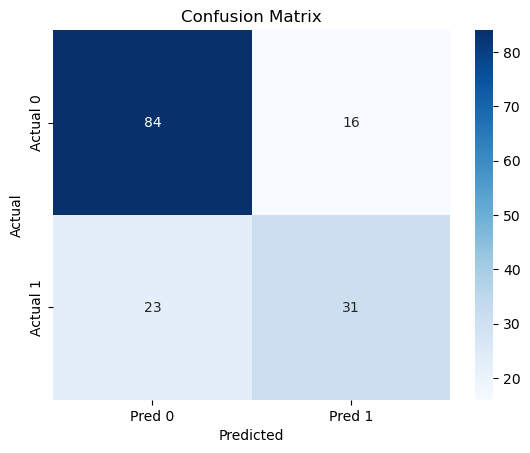

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()